In [4]:
import pandas as pd
import requests
import pprint
import json
import time
from pandas import json_normalize
import ast

pd.set_option('display.max_colwidth', None) ## 셀 최대 너비 제한 해제

##### 4에서 만든 테이블을 한글 번역한 버전의 테이블 불러오기

In [5]:
units_df = pd.read_csv('C:/Users/user/Documents/GitHub/Final-Project-A09-/유닛 조합과 별갯수 테이블.csv')

units_df.head()

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,코부코,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,2,2,...,0,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle"
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir"
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong"
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra"
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana"


##### 조합 클러스터링을 위하여 챔피언 컬럼의 1~3 값을 1로 치환하여 새로운 데이터 프레임 생성

In [6]:
# 기존 데이터프레임을 뒤에서 join 해주기 위해 그대로 두어야하므로 복사하여 combination_clustering 변수에 할당

combination_clustering = units_df.copy()

# '시비르'부터 '자야'까지의 컬럼값이 0인 경우를 제외하고 모두 1로 변경

combination_clustering.loc[:, '시비르':'자야'] = combination_clustering.loc[:, '시비르':'자야'].applymap(lambda x: 0 if x == 0 else 1)
              # 시비르 컬럼부터 자야 컬럼까지 모든행을 선택                         # 선택한 모든 데이터(applymap)에 람다 함수를 적용
                                                                                 # 여기서 람다 함수는 x가 0이면 0 나머지는 1로 치환

# 작업 확인
combination_clustering.head()

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,코부코,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,1,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle"
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir"
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong"
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra"
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana"


##### 시비르부터 자야까지 모든 챔피언 컬럼의 값을 하나의 문자열로 합쳐서 새로운 컬럼 생성

In [7]:
# '시비르'부터 '자야'까지의 열을 하나의 문자열로 결합하여 새로운 열 생성
combination_clustering['comb_binary'] = combination_clustering.loc[:, '시비르':'자야'].astype(str).apply(''.join, axis=1)

combination_clustering.head()

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,comb_binary
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,1,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",1111111110000000000000000000000000000000000000000000000000000
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",0000000001111111110000000000000000000000000000000000000000000
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",0000000100000000111111110000000000000000000000000000000000000
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",0001001100000000100001101110000000000000000000000000000000000
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",0100100110000000101010000001100000000000000000000000000000000


##### 엘보우 메서드를 통하여 적절한 군집 갯수 추출

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

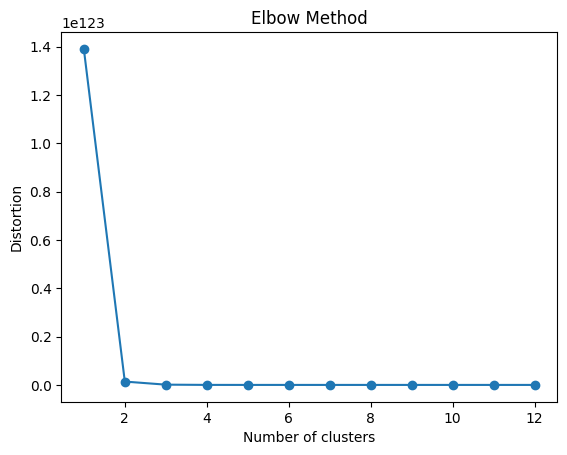

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 엘보우 메서드를 사용하여 적절한 클러스터 개수를 결정
distortions = []
# 클러스터링할 데이터
data = combination_clustering['comb_binary'].values.reshape(-1, 1)
for i in range(1, 13):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)

# 결과를 그래프로 시각화
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [9]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=1, min_samples=50)  # eps와 min_samples는 적절한 값으로 조정해야 합니다.

# 클러스터링할 데이터
data = combination_clustering['comb_binary'].values.reshape(-1, 1)

# 모델 피팅
clusters = dbscan.fit_predict(data)

# 클러스터링 결과를 데이터프레임에 추가
combination_clustering['DBSCAN_cluster'] = clusters

# 클러스터링 결과 출력
combination_clustering['DBSCAN_cluster'].unique()


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

#####